In [2]:
import pandas as pd
from pandas_ta import pandas_ta as pdt
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.subplots import make_subplots
#from sklearn.

ModuleNotFoundError: No module named 'pandas_ta'

In [37]:
# Data from investing.com (2017-2022)
table = pd.read_csv("./source/Bitcoin Historical Data.csv").sort_index(ascending=False)
table

,Date,Price,Open,High,Low,Vol.,Change %
1991,"Jan 01, 2017",995.4,963.4,"1,001.6",956.1,41.15K,3.33%
1990,"Jan 02, 2017","1,017.0",995.4,"1,031.7",990.2,64.95K,2.17%
1989,"Jan 03, 2017","1,033.3","1,017.0","1,035.5","1,006.5",54.79K,1.60%
1988,"Jan 04, 2017","1,135.4","1,033.3","1,148.5","1,022.3",156.27K,9.88%
1987,"Jan 05, 2017",989.3,"1,135.4","1,150.6",874.5,240.01K,-12.86%
...,...,...,...,...,...,...,...
4,"Jun 11, 2022","28,403.4","29,083.3","29,426.6","28,161.8",82.92K,-2.34%
3,"Jun 12, 2022","26,606.3","28,404.0","28,534.8","26,606.3",120.02K,-6.33%
2,"Jun 13, 2022","22,448.0","26,606.3","26,857.6","22,006.3",379.26K,-15.63%
1,"Jun 14, 2022","22,157.3","22,449.1","23,200.3","20,860.9",251.01K,-1.29%


In [38]:
table.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1992,1992,1992,1992,1992,1992,1992
unique,1992,1983,1976,1975,1984,1897,1051
top,"Jan 01, 2017",995.4,"9,296.5","3,485.9","9,193.9",1.05M,-0.50%
freq,1,2,2,2,2,6,9


In [39]:
#Data cleaning
cols = ["Price", "Open","High", "Low"]
for col in cols:
    table[col] = table[col].str.replace(",", "")

table["Vol."] = table["Vol."].str.replace("K","0")
table["Vol."] = table["Vol."].str.replace("M","0000")
table["Vol."] = table["Vol."].str.replace("B","0000000")
table["Vol."] = table["Vol."].str.replace(".","")
table["Change %"] = table["Change %"].str.replace("%","")
table.set_index(pd.DatetimeIndex(table["Date"]), inplace=True)
table

C:\Users\sergi\AppData\Local\Temp\ipykernel_10752\1432771710.py:9: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2017-01-01,"Jan 01, 2017",995.4,963.4,1001.6,956.1,41150,3.33
2017-01-02,"Jan 02, 2017",1017.0,995.4,1031.7,990.2,64950,2.17
2017-01-03,"Jan 03, 2017",1033.3,1017.0,1035.5,1006.5,54790,1.60
2017-01-04,"Jan 04, 2017",1135.4,1033.3,1148.5,1022.3,156270,9.88
2017-01-05,"Jan 05, 2017",989.3,1135.4,1150.6,874.5,240010,-12.86
...,...,...,...,...,...,...,...
2022-06-11,"Jun 11, 2022",28403.4,29083.3,29426.6,28161.8,82920,-2.34
2022-06-12,"Jun 12, 2022",26606.3,28404.0,28534.8,26606.3,120020,-6.33
2022-06-13,"Jun 13, 2022",22448.0,26606.3,26857.6,22006.3,379260,-15.63


In [40]:
cols.append(["Vol.", "Change %"])
for col in cols:
    table[col] = table[col].astype(float)
table

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2017-01-01,"Jan 01, 2017",995.4,963.4,1001.6,956.1,41150.0,3.33
2017-01-02,"Jan 02, 2017",1017.0,995.4,1031.7,990.2,64950.0,2.17
2017-01-03,"Jan 03, 2017",1033.3,1017.0,1035.5,1006.5,54790.0,1.60
2017-01-04,"Jan 04, 2017",1135.4,1033.3,1148.5,1022.3,156270.0,9.88
2017-01-05,"Jan 05, 2017",989.3,1135.4,1150.6,874.5,240010.0,-12.86
...,...,...,...,...,...,...,...
2022-06-11,"Jun 11, 2022",28403.4,29083.3,29426.6,28161.8,82920.0,-2.34
2022-06-12,"Jun 12, 2022",26606.3,28404.0,28534.8,26606.3,120020.0,-6.33
2022-06-13,"Jun 13, 2022",22448.0,26606.3,26857.6,22006.3,379260.0,-15.63


In [41]:
table.describe()

,Price,Open,High,Low,Vol.,Change %
count,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1992.000000
mean,17386.927460,17376.887701,17858.433986,16830.988855,3.092015e+07,0.244603
std,17522.355525,17526.152489,17994.143802,16984.040663,2.442359e+08,4.197396
min,785.400000,785.400000,826.400000,739.500000,2.600000e+02,-39.180000
25%,6185.725000,6181.125000,6351.325000,5940.825000,8.820000e+04,-1.610000
50%,9169.950000,9166.050000,9336.950000,8944.450000,1.822450e+05,0.215000
75%,30412.375000,30416.050000,31605.800000,29364.275000,6.068675e+05,2.140000
max,67527.900000,67528.700000,68990.600000,66334.900000,4.470000e+09,25.560000


In [42]:
fig = go.Figure(data=go.Scatter(x=table["Date"], y=table["Price"], mode="lines"))
fig.show()

In [43]:
cols = ["Date", "Price"]
x = table[cols[0]]
y = table[cols[1]]

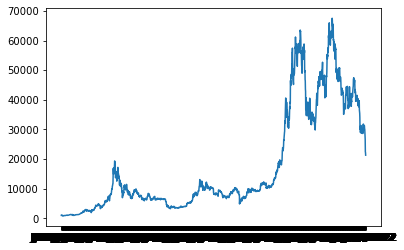

In [44]:
fig, ax = plt.subplots()
ax.plot(x,y)

In [34]:
#fig2 = make_subplots(specs=[[{"secondary_y": True}]])
#fig2.add_trace(go.Scatter(x=table["Date"], y=table["Price"], name="Price"), secondary_y=False)
#fig2.add_trace(go.Bar(x=table["Date"], y=table["Vol."], name="Volume"), secondary_y=True)
#fig2.update_yaxes(range=[0,7000000000], secondary_y=True)
#fig2.update_yaxes(visible=False, secondary_y=True)

In [ ]:
# Adding indicators

